**<font color = 'blue' size = 38>ADVANCED NEURAL NETWORKS & NLP</font>**

#<font color = 'Orange'>LSTM for Time Series</font>

Bitcoin price prediction

## <font color = 'Orange'>Data preparation</font>

In [36]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-09 Advanced Neural Networks & NLP/BTC-USD.csv')

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000
1,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096
2,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400


In [38]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [39]:
# Using 80% of data for training, 40% for validation.

train = df.iloc[0:int(len(df)*0.8), :]
test =  df.iloc[int(len(df)*0.8):, :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1169, 293)


In [40]:
X_train, Y_train = [], []
for i in range(len(train) - 3):
  a = train.iloc[i:(i + 3), 4]
  X_train.append(a)
  Y_train.append(train.iloc[i + 3, 4])
print(len(Y_train))


1166


In [41]:
X_test, Y_test = [], []
for i in range(len(test) - 3):
  a = test.iloc[i:(i + 3), 5]
  X_test.append(a)
  Y_test.append(test.iloc[i + 3, 5])
print(len(Y_test))


290


In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## <font color = 'Orange'>LSTM Model</font>

### <font color = 'Orange'>Define Keras Model</font>

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100,  activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))


### <font color = 'Orange'>Compile Keras Model</font>

In [44]:
model.compile(loss='mae', optimizer='adam')


### <font color = 'Orange'>Fit Keras Model</font>

In [45]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/30
10/10 - 6s - loss: 5495.7534 - val_loss: 8569.8213 - 6s/epoch - 571ms/step
Epoch 2/30
10/10 - 0s - loss: 5268.5918 - val_loss: 8196.3428 - 170ms/epoch - 17ms/step
Epoch 3/30
10/10 - 0s - loss: 4995.0552 - val_loss: 7531.6387 - 148ms/epoch - 15ms/step
Epoch 4/30
10/10 - 0s - loss: 4495.2412 - val_loss: 6710.6396 - 199ms/epoch - 20ms/step
Epoch 5/30
10/10 - 0s - loss: 3905.5881 - val_loss: 5574.7910 - 118ms/epoch - 12ms/step
Epoch 6/30
10/10 - 0s - loss: 3074.4583 - val_loss: 3982.4473 - 233ms/epoch - 23ms/step
Epoch 7/30
10/10 - 0s - loss: 1921.2949 - val_loss: 1797.0360 - 233ms/epoch - 23ms/step
Epoch 8/30
10/10 - 0s - loss: 491.7901 - val_loss: 752.9176 - 223ms/epoch - 22ms/step
Epoch 9/30
10/10 - 0s - loss: 588.6657 - val_loss: 438.3784 - 272ms/epoch - 27ms/step
Epoch 10/30
10/10 - 0s - loss: 292.2231 - val_loss: 336.3486 - 227ms/epoch - 23ms/step
Epoch 11/30
10/10 - 0s - loss: 263.8744 - val_loss: 302.8429 - 154ms/epoch - 15ms/step
Epoch 12/30
10/10 - 0s - loss: 262.2669 

### <font color = 'Orange'>Evaluate Keras Model</font>

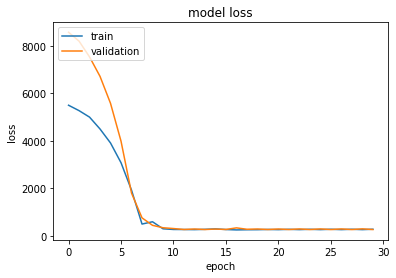

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

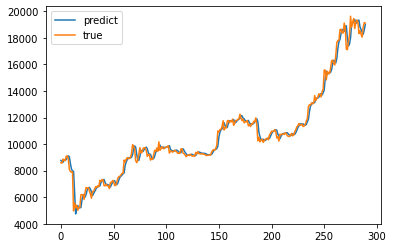

In [12]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(Y_test, label='true')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import r2_score

r2_score(y_pred,Y_test)

0.985021311467074

# <font color = 'Orange'>CNN & LSTM for sentiment analysis</font>

## <font color = 'Orange'>Data Preparation</font>
Sentiment analysis of bitcoin tweets

Link: https://www.kaggle.com/skularat/bitcoin-tweets

In [48]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-09 Advanced Neural Networks & NLP/bitcointweets.csv')

In [49]:
df.head()

,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [50]:
df.columns = ['date','text','author','id','unknown','tags','url','sentiment']

In [51]:
df.head()

,date,text,author,id,unknown,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [52]:
df.drop(columns=['unknown'],axis=1, inplace = True)

In [53]:
df.head()

,date,text,author,id,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



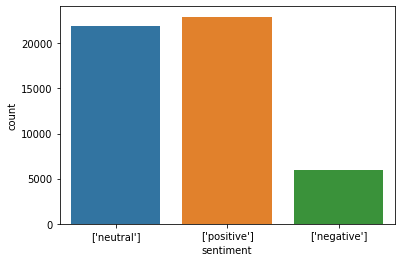

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df['sentiment'])

In [55]:

# text length
df['text_length'] = df['text'].apply(len)

In [56]:
df.head()

,date,text,author,id,tags,url,sentiment,text_length
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],137
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],34
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],146
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],138


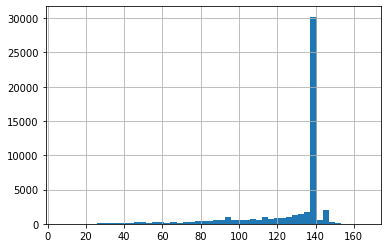

In [57]:
df['text_length'].hist(bins=50)


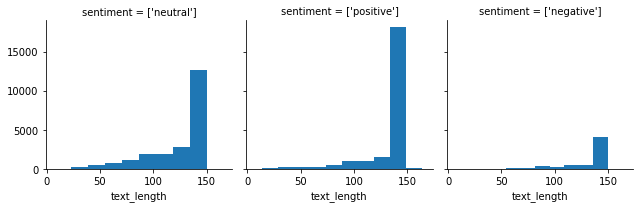

In [58]:
g = sns.FacetGrid(df,col='sentiment')
g.map(plt.hist,'text_length')

In [59]:
X = df['text']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, 
                                                    test_size=0.2,
                                                    random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(40686,) (10172,) (40686, 3) (10172, 3)


## <font color='Orange'>Tokenization</font>

In [61]:
# Tokenize Text
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

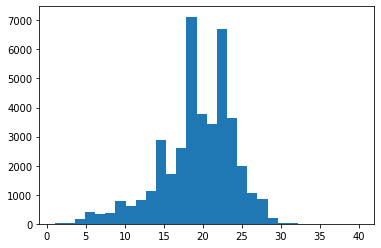

In [62]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [63]:
from keras.preprocessing import sequence
max_words = 23
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(40686, 23) (10172, 23)


## <font color = 'Orange'>CNN + LSTM</font>

In [64]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### <font color = 'Orange'>Define Keras Model</font>

In [65]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 23, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

### <font color = 'Orange'>Compile Keras Model</font>

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### <font color = 'Orange'>Fit Keras Model</font>

In [67]:
model_history = model.fit(X_train, Y_train,  epochs=10, batch_size=128, verbose=2, validation_split=0.2)


Epoch 1/10
255/255 - 12s - loss: 0.4540 - accuracy: 0.8041 - val_loss: 0.1447 - val_accuracy: 0.9522 - 12s/epoch - 45ms/step
Epoch 2/10
255/255 - 8s - loss: 0.0781 - accuracy: 0.9768 - val_loss: 0.1115 - val_accuracy: 0.9653 - 8s/epoch - 31ms/step
Epoch 3/10
255/255 - 8s - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.1307 - val_accuracy: 0.9678 - 8s/epoch - 31ms/step
Epoch 4/10
255/255 - 8s - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.1358 - val_accuracy: 0.9673 - 8s/epoch - 31ms/step
Epoch 5/10
255/255 - 9s - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.1527 - val_accuracy: 0.9678 - 9s/epoch - 36ms/step
Epoch 6/10
255/255 - 8s - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.1769 - val_accuracy: 0.9646 - 8s/epoch - 31ms/step
Epoch 7/10
255/255 - 8s - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.1639 - val_accuracy: 0.9657 - 8s/epoch - 30ms/step
Epoch 8/10
255/255 - 8s - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.1717 - val_accuracy: 0.9653 - 8s/epoch - 31ms/step
Epoch 9/10
255

In [69]:
model.save('/content/drive/MyDrive/model_cnn_lstm')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model_cnn_lstm/assets


In [70]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/model_cnn_lstm')


In [72]:
y_pred = model.predict(X_test)



In [73]:
y_pred = y_pred.round()

### <font color = 'Orange'>Evaluate Keras Model</font>

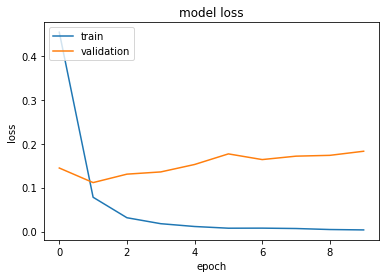

In [74]:
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

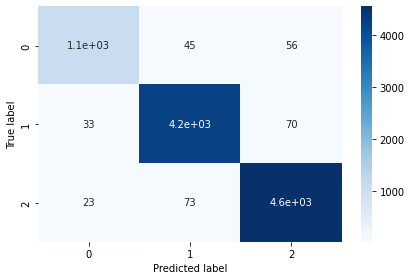

In [77]:
import seaborn as sns

confmat = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(y_pred,axis=1))

sns.heatmap(confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [78]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(y_pred,axis=1)))


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1177
           1       0.97      0.98      0.97      4343
           2       0.97      0.98      0.98      4652

    accuracy                           0.97     10172
   macro avg       0.97      0.96      0.96     10172
weighted avg       0.97      0.97      0.97     10172



# <font color = 'Orange'>Word2Vec model </font>

## <font color = 'Orange'> Corpus preparation </font>

In [80]:
texts = df['text']
matrix = []
for sentence in texts:
  words = sentence.split(" ")
  matrix.append(words)

In [81]:
matrix

[['@lopp',
  '@_Kevin_Pham',
  '@psycho_sage',
  '@naval',
  'But',
  '@ProfFaustus',
  '(dum',
  'b',
  'a',
  'ss)',
  'said',
  'you',
  'know',
  'nothing',
  'about',
  '#Bitcoin',
  '...',
  '😂😂😂',
  'https://t.co/SBAMFQ2Yiy'],
 ['RT',
  '@tippereconomy:',
  'Another',
  'use',
  'case',
  'for',
  '#blockchain',
  'and',
  '#Tipper.',
  'The',
  '#TipperEconomy',
  '',
  'can',
  'unseat',
  'Facebook',
  'and',
  'change',
  'everything!',
  'ICO',
  'Live',
  'No…'],
 ['free', 'coins', 'https://t.co/DiuoePJdap'],
 ['RT',
  '@payvxofficial:',
  'WE',
  'are',
  'happy',
  'to',
  'announce',
  'that',
  'PayVX',
  'Presale',
  'Phase',
  '1',
  'is',
  'now',
  'LIVE!\n\nSign',
  'up',
  '--&gt;&gt;',
  'https://t.co/dhprzsSxek\nCurrencies',
  'accept…'],
 ['Copy',
  'successful',
  'traders',
  'automatically',
  'with',
  'Bitcoin!',
  '💰💰\n\nI',
  'copy',
  '"Dividend667".',
  'Do',
  'you?\n\n➡️',
  'https://t.co/qb2NXPknVt…',
  'https://t.co/Q43fKQRYzx'],
 ['RT',
  '@bethe

## <font color = 'Orange'>W2V Model</font>

In [82]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(matrix, size=150, min_count=1, window=5, workers=4)



In [83]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



## <font color = 'Orange'>Metadata and vectors saving</font>

In [ ]:
import io
# Vector file, `\t` seperated the vectors and `\n` seperate the words

out_v = io.open('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-09 Advanced Neural Networks & NLP/vecs.tsv', 'w', encoding='utf-8')

# Meta data file, `\n` seperated word

out_m = io.open('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-09 Advanced Neural Networks & NLP/meta.tsv', 'w', encoding='utf-8')

# Write meta file and vector file
for index in range(len(model.wv.index2word)):
    word = model.wv.index2word[index]
    vec = model.wv[word]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

## <font color = 'Orange'> Visualization of the embeddings</font>

With the help of https://projector.tensorflow.org/ load the vectors and metadata
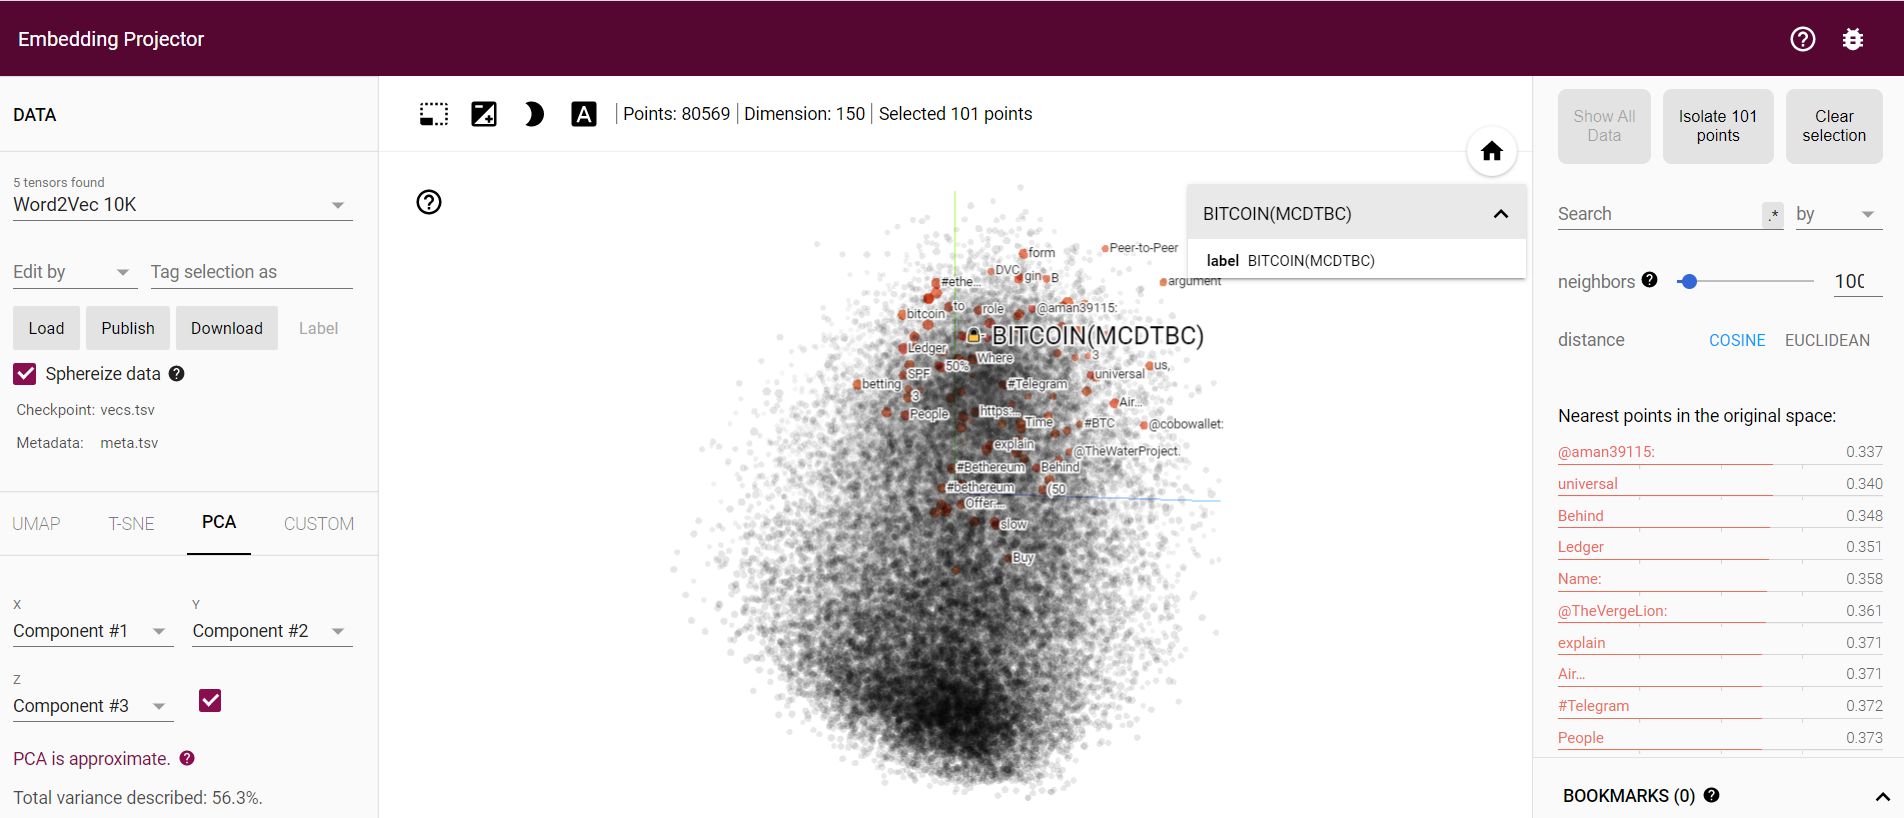

# <font color = 'Orange'>Named Entity Recognition</font>

In [85]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [86]:
doc = nlp(df['text'][0])
print([(X.text, X.label_) for X in doc.ents])

[('@_Kevin_Pham', 'ORG'), ('about #Bitcoin', 'MONEY')]


In [87]:
displacy.render(nlp(df['text'][50]), jupyter=True, style='ent')


In [88]:
displacy.render(nlp(str(df['text'][50])), style='dep', jupyter = True, options = {'distance': 120})